# Project Speed Dating

### Librairies

In [1]:
!pip install -U kaleido

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
#pio.renderers.default = "svg"

import warnings
warnings.filterwarnings("ignore")

## Data importation and cleaning

In [3]:
df = pd.read_csv("src\Speed+Dating+Data.csv", encoding = "ISO-8859-1")

# Option to not truncate the dataset
pd.set_option("display.max_columns", None)
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [4]:
# Shape of the dataset
print("The dataset is made of", df.shape[0], "observations and", df.shape[1], "features")

The dataset is made of 8378 observations and 195 features


In [5]:
# Types of data
df.dtypes.value_counts()

float64    174
int64       13
object       8
dtype: int64

We see that most of the data are numeric.

In [6]:
# Counting null values
df.isnull().sum().sort_values(ascending=False)

num_in_3    7710
numdat_3    6882
expnum      6578
sinc7_2     6423
amb7_2      6423
            ... 
wave           0
condtn         0
idg            0
gender         0
dec            0
Length: 195, dtype: int64

We see that the dataset has many null values for some columns. This is because some questions were mandatory only if the person had answered "yes" to the previous question. In addition, omissions in these types of questionnaires can be frequent. So I’m going to focus my analysis on the most complete and actionable fields.

In order to clean up the dataset and have sufficiently reliable results, we will first remove waves 6 to 9 because the imposed scoring method is different from the one of the other waves (notation in a scale of 1 to 10 against 100 points to be distributed). I have chosen to remove these waves as they represent a smaller subset of the original dataset. It is also important to note that wave 12 participants were forced to say "yes" for a second appointment only to half of the people they met at most.

In [7]:
# Remove waves 6 to 9
waves_to_drop = [6, 7, 8, 9]
df_clean = df[~df.wave.isin(waves_to_drop)]
df_clean["wave"].unique()

array([ 1,  2,  3,  4,  5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
      dtype=int64)

For a better understanding of the dataset, we will replace some numerical values with their string equivalents.

In [8]:
race_replacement = {1:"Black/African American",
                    2:"European/Caucasian-American",
                    3:"Latino/Hispanic American",
                    4:"Asian/Pacific Islander/Asian-American",
                    5:"Native American",
                    6:"Other"}

goal_replacement = {1:"Seemed like a fun night out",
                    2:"To meet new people",
                    3:"To get a date",
                    4:"Looking for serious relationship",
                    5:"To say I did it",
                    6:"Other"}

frequency_replacement = {1:"Several times a week",
                         2:"Twice a week",
                         3:"Once a week",
                         4:"Twice a month",
                         5:"Once a month",
                         6:"Several times a year",
                         7:"Almost never"}

In [9]:
df_clean["gender"].replace({0:"Female",1:"Male"}, inplace=True)
df_clean["race"].replace(race_replacement, inplace=True)
df_clean["goal"].replace(goal_replacement, inplace=True)
df_clean["date"].replace(frequency_replacement, inplace=True)

df_clean[["gender", "race", "goal", "date"]].head()

,gender,race,goal,date
0,Female,Asian/Pacific Islander/Asian-American,To meet new people,Almost never
1,Female,Asian/Pacific Islander/Asian-American,To meet new people,Almost never
2,Female,Asian/Pacific Islander/Asian-American,To meet new people,Almost never
3,Female,Asian/Pacific Islander/Asian-American,To meet new people,Almost never
4,Female,Asian/Pacific Islander/Asian-American,To meet new people,Almost never


## Exploratory Data Analysis

### Global analysis of the dataset

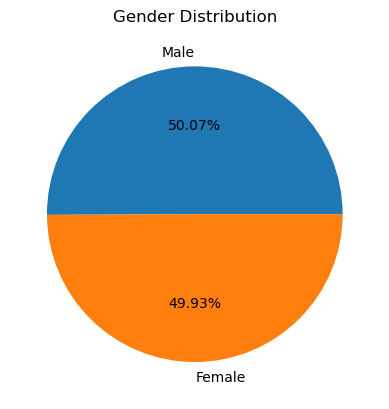

In [10]:
# Look at the gender distribution
pie_data = df_clean["gender"].value_counts()
fig,ax = plt.subplots()
ax.pie(pie_data, labels=["Male","Female"], autopct="%.2f%%")
ax.set(title="Gender Distribution");

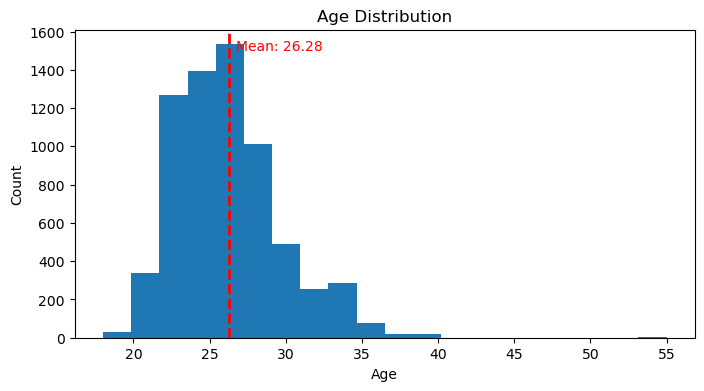

In [11]:
# Look at the global age distribution
ax = df_clean.age.hist(bins=20, figsize=(8,4))
ax.set_title("Age Distribution", fontsize=12)
ax.set_xlabel("Age",fontsize=10)
ax.set_ylabel("Count", fontsize=10)
ax.grid(False)

# Calculate the mean
mean_age = df_clean.age.mean()

# Annotate the mean on the plot
ax.axvline(mean_age, color="r", linestyle="--", linewidth=2)
ax.annotate(f"Mean: {mean_age:.2f}", xy=(mean_age, ax.get_ylim()[1]), xytext=(5, -15),
            textcoords="offset points", color="r", fontsize=10)

plt.show();

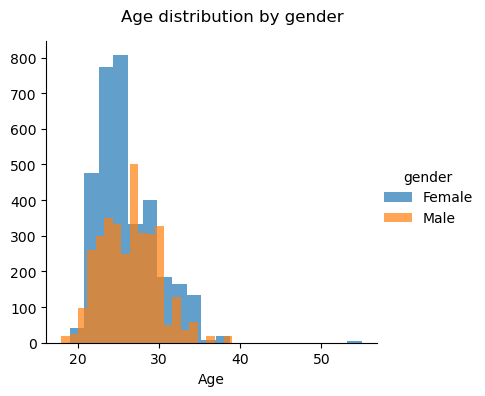

In [12]:
# Look at the age distribution between men and women
result = sns.FacetGrid(df_clean, hue="gender", height=4)
result.map(plt.hist, "age", alpha= 0.7, bins=20)
result.set_xlabels("Age", fontsize=10)
plt.subplots_adjust(top=0.9)
result.fig.suptitle("Age distribution by gender", fontsize=12)
result.add_legend();

The ages are evenly distributed between men and women. We find that women seem a little younger than men in general.

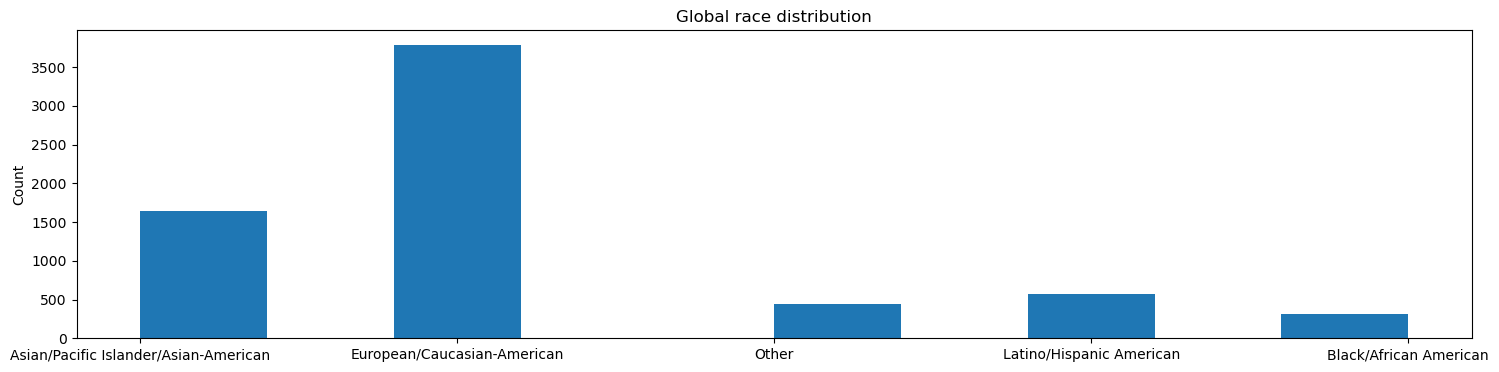

In [13]:
# Look at the race distribution
ax = df_clean.race.hist(figsize=(18,4))
ax.set_title("Global race distribution", fontsize=12)
ax.set_ylabel("Count", fontsize=10)
ax.grid(False)

The majority of participants are European/Caucasian-American.

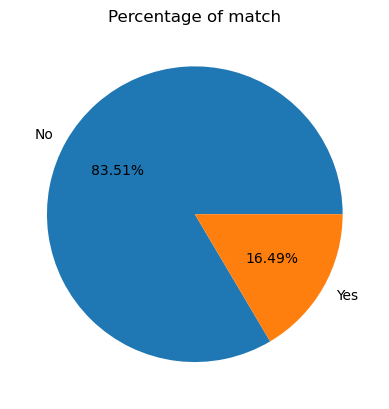

In [14]:
# Look at % of match
pie_data = df_clean["match"].value_counts()
fig,ax = plt.subplots()
ax.pie(pie_data, labels=["No","Yes"], autopct="%.2f%%")
ax.set(title="Percentage of match");

The majority of dates did not end up to a match.

In [15]:
activities_interested=["sports",
                       "tvsports",
                       "exercise",
                       "dining",
                       "museums",
                       "art",
                       "hiking",
                       "gaming",
                       "clubbing",
                       "reading",
                       "tv",
                       "theater",
                       "movies",
                       "concerts",
                       "music",
                       "shopping",
                       "yoga"]

activities_by_gender = df_clean.groupby(["gender"]).mean()[activities_interested].values

In [16]:
# Look at the activities men and women are interested in 
trace1 = go.Bar(
    x=activities_interested,
    y=activities_by_gender[0,:],
    name="Female"
)
trace2 = go.Bar(
    x=activities_interested,
    y=activities_by_gender[1,:],
    name="Male",
)

data = [trace1, trace2]
layout = go.Layout(
    title="Activities men and women are interested in",
    title_x=0.5,
    font=dict(
        size=12
    ),
    barmode = "stack",
    legend=dict(
        font=dict(
            size=12
        )
    )
)
fig = go.Figure(data=data, layout=layout)
#fig.show()

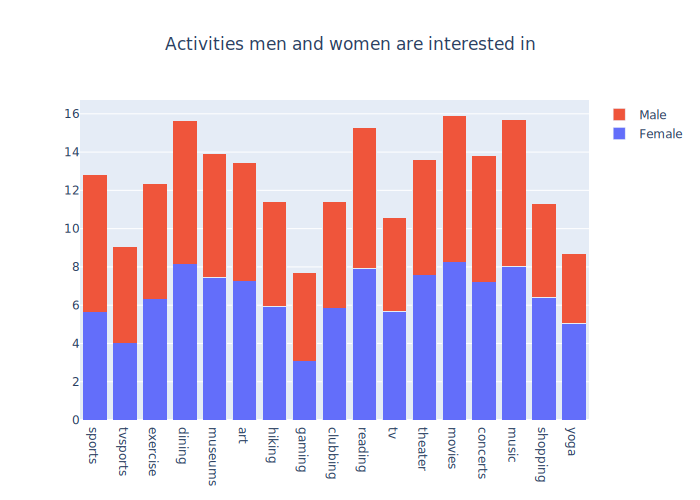

In [17]:
from IPython.display import SVG, display

img_bytes = pio.to_image(fig, format="svg")
display(SVG(img_bytes))

The activities most appreciated by men and women are dinners, reading, movies and music.

### Detailed analysis of what is the most important to have a second date

#### Importance of race and religion

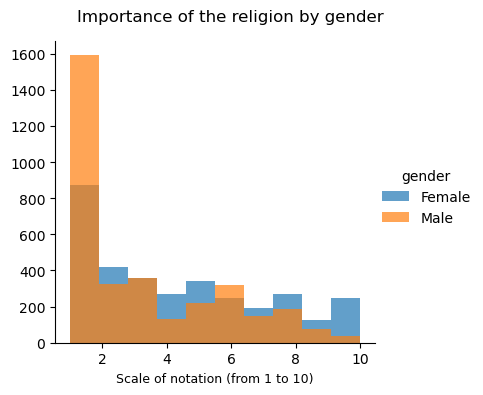

In [18]:
# Importance of religion by gender
result = sns.FacetGrid(df_clean, hue="gender", height=4)
result.map(plt.hist, "imprelig", alpha= 0.7, bins=10)
result.set_xlabels("Scale of notation (from 1 to 10)", fontsize=9)
plt.subplots_adjust(top=0.9)
result.fig.suptitle("Importance of the religion by gender", fontsize=12)
result.add_legend();

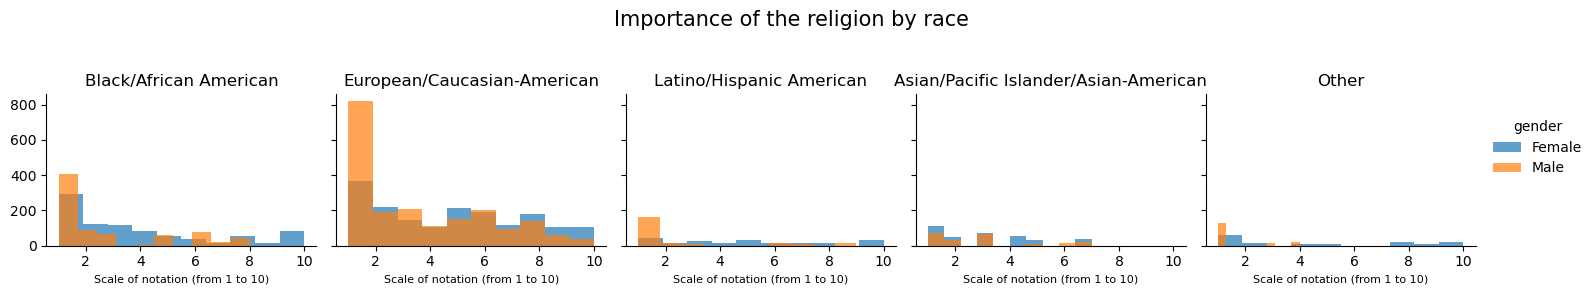

In [19]:
# # Importance of religion by race and gender
result = sns.FacetGrid(df_clean, col="race", hue="gender")
result.map(plt.hist, "imprelig", alpha= 0.7, bins=10)
result.add_legend()
axes = result.axes.flatten()
axes[0].set_title("Black/African American")
axes[1].set_title("European/Caucasian-American")
axes[2].set_title("Latino/Hispanic American")
axes[3].set_title("Asian/Pacific Islander/Asian-American")
axes[4].set_title("Other")
result.set_xlabels("Scale of notation (from 1 to 10)", fontsize=8)
plt.subplots_adjust(top=0.7)
result.fig.suptitle("Importance of the religion by race", fontsize=15);

#result._legend.set_title('')

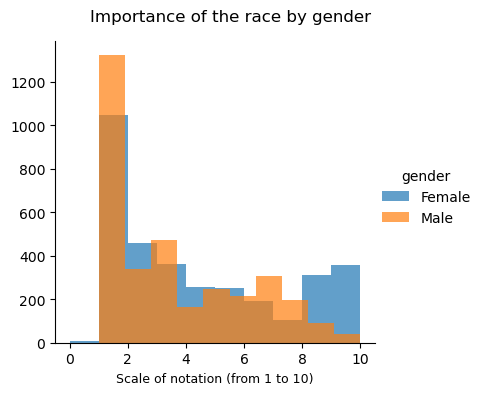

In [20]:
# Importance of race by gender
result = sns.FacetGrid(df_clean, hue="gender", height=4)
result.map(plt.hist, "imprace", alpha= 0.7, bins=10)
result.set_xlabels("Scale of notation (from 1 to 10)", fontsize=9)
plt.subplots_adjust(top=0.9)
result.fig.suptitle("Importance of the race by gender", fontsize=12)
result.add_legend();

We see overall that religion does not matter to the participants. The same applies to race, however, we can note that women seem to give a bit more importance to race than men.

#### Importance of attributes

In [21]:
attr_before_date = ["attr1_1", "sinc1_1","intel1_1","fun1_1","amb1_1","shar1_1"]
attr_after_date = ["attr1_2", "sinc1_2","intel1_2","fun1_2","amb1_2","shar1_2"]
attr_after_weeks = ["attr1_3", "sinc1_3","intel1_3","fun1_3","amb1_3","shar1_3"]

attr_names = ["Attractiveness","Sincerity","Intelligence","Fun","Ambition","Shared Interests"]

In [22]:
attr_before_date_by_gender = df_clean.groupby(["gender"]).mean()[attr_before_date].values

# Look at the attributes men and women think are the most important before the date
trace1 = go.Bar(
    x=attr_names,
    y=attr_before_date_by_gender[0,:],
    name="Female"
)

trace2 = go.Bar(
    x=attr_names,
    y=attr_before_date_by_gender[1,:],
    name="Male"
)


data = [trace1, trace2]
layout = go.Layout(
    title="Attributes importance before the date by gender",
    title_x=0.5,
    font=dict(
        size=12
    ),
    legend=dict(
        font=dict(
            size=12
        )
    )
)
fig = go.Figure(data=data, layout=layout)
fig.show();

In [23]:
attr_after_date_by_gender = df_clean.groupby(["gender"]).mean()[attr_after_date].values

# Look at the attributes men and women think are the most important after the date
trace1 = go.Bar(
    x=attr_names,
    y=attr_after_date_by_gender[0,:],
    name="Female"
)

trace2 = go.Bar(
    x=attr_names,
    y=attr_after_date_by_gender[1,:],
    name="Male"
)


data = [trace1, trace2]
layout = go.Layout(
    title="Attributes importance after the date by gender",
    title_x=0.5,
    font=dict(
        size=12
    ),
    legend=dict(
        font=dict(
            size=12
        )
    )
)
fig = go.Figure(data=data, layout=layout)
fig.show();

In [24]:
attr_after_weeks_by_gender = df_clean.groupby(["gender"]).mean()[attr_after_weeks].values

# Look at the attributes men and women think are the most important after weeks
trace1 = go.Bar(
    x=attr_names,
    y=attr_after_weeks_by_gender[0,:],
    name="Female"
)

trace2 = go.Bar(
    x=attr_names,
    y=attr_after_weeks_by_gender[1,:],
    name="Male"
)


data = [trace1, trace2]
layout = go.Layout(
    title="Attributes importance after 3-4 weeks by gender",
    title_x=0.5,
    font=dict(
        size=12
    ),
    legend=dict(
        font=dict(
            size=12
        )
    )
)
fig = go.Figure(data=data, layout=layout)
fig.show();

The most important attribute for men before, after and weeks after the date is still the Attractiveness whereas it changed for women from Intelligence to Attractiveness. We can guess it is because of the 4 minutes date, it's not long enough to judge the other person intelligence or sincerity.  

In [25]:
attr_opposite_sex = ["attr2_1", "sinc2_1","intel2_1","fun2_1","amb2_1","shar2_1"]
attr_opposite_sex_by_gender = df_clean.groupby(["gender"]).mean()[attr_opposite_sex].values

# Look at the attributes men and women think are the most important fo the opposite sex
trace1 = go.Bar(
    x=attr_names,
    y=attr_opposite_sex_by_gender[0,:],
    name="Female"
)

trace2 = go.Bar(
    x=attr_names,
    y=attr_opposite_sex_by_gender[1,:],
    name="Male"
)


data = [trace1, trace2]
layout = go.Layout(
    title="Attributes importance for the opposite sex",
    title_x=0.5,
    font=dict(
        size=12
    ),
    legend=dict(
        font=dict(
            size=12
        )
    )
)
fig = go.Figure(data=data, layout=layout)
fig.show();

Women got it right for what men think is attractive in opposite sex.

### Importance of goals and dates frequency

In [26]:
df_clean.goal.value_counts(dropna=False)

Seemed like a fun night out         2739
To meet new people                  2492
To get a date                        519
To say I did it                      432
Other                                353
Looking for serious relationship     207
NaN                                   74
Name: goal, dtype: int64

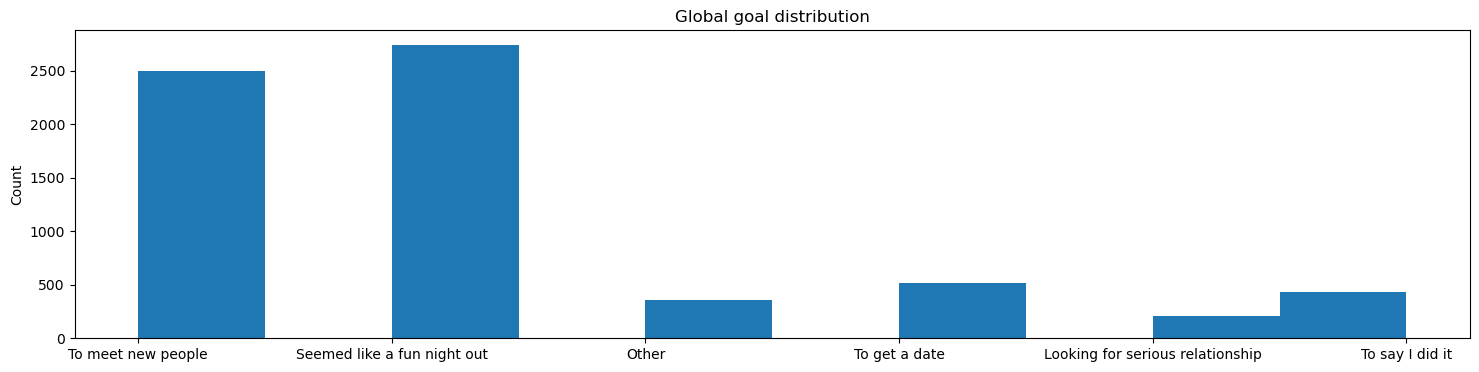

In [27]:
# Look at the goals distribution
ax = df_clean.goal.hist(figsize=(18,4))
ax.set_title("Global goal distribution", fontsize=12)
ax.set_ylabel("Count", fontsize=10)
ax.grid(False)

Most participants want to have a fun / good time and meet new people. 

In [28]:
df_clean.date.value_counts(dropna=False)

Twice a month           1683
Several times a year    1669
Almost never            1216
Once a month            1204
Once a week              610
Twice a week             268
NaN                       92
Several times a week      74
Name: date, dtype: int64

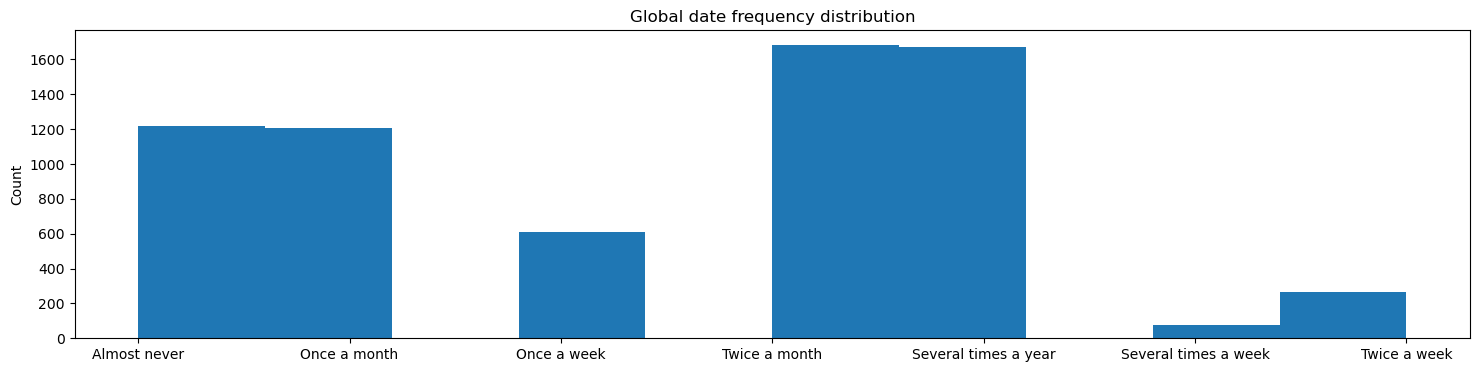

In [29]:
# Look at the dates frequency distribution
ax = df_clean.date.hist(figsize=(18,4))
ax.set_title("Global date frequency distribution", fontsize=12)
ax.set_ylabel("Count", fontsize=10)
ax.grid(False)

Most participants make dates twice a month or several times a year.

In [30]:
pd.crosstab(df_clean.goal, df_clean.match, normalize='index')

match,0,1
goal,,
Looking for serious relationship,0.816425,0.183575
Other,0.861190,0.138810
Seemed like a fun night out,0.833151,0.166849
To get a date,0.820809,0.179191
To meet new people,0.836677,0.163323
To say I did it,0.847222,0.152778


In [31]:
pd.crosstab(df_clean.date, df_clean.match, normalize='index')

match,0,1
date,,
Almost never,0.848684,0.151316
Once a month,0.855482,0.144518
Once a week,0.795082,0.204918
Several times a week,0.635135,0.364865
Several times a year,0.855003,0.144997
Twice a month,0.823529,0.176471
Twice a week,0.776119,0.223881


People who go more often on dates had more match than others. The purpose of the date, whether it is to meet a new person or to look for a serious relationship does not really influence whether or not to have a match. 

### Importance de l'ordre de passage

In [ ]:
order_match = df_clean.groupby(["order"]).sum()
order_match.head()

,iid,id,idg,condtn,wave,round,position,positin1,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,imprace,imprelig,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
order,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,133895,3671.0,7056,763,5303,6830,3691,2711.0,3651,133780.0,103,66.11,196,11609.0,1250.0,10794.85,7540.07,9111.49,7607.62,4333.76,4966.22,218,2879.0,3439.0,3414.0,2947.0,3018.0,2220.0,2886.0,2526.0,850.0,11614.0,3264.0,1582.0,1584.0,945.0,2308.0,2827.0,1998.0,2756.0,3458.0,3077.0,2964.0,2543.0,1684.0,2530.0,3373.0,2347.0,3007.0,3507.0,3062.0,3480.0,2488.0,1954.0,2456.0,742.0,10705.85,7591.07,9066.49,7670.62,4369.76,4950.22,10120.0,3900.0,4534.0,5700.0,3424.0,3882.0,14516.0,5562.0,6247.0,8184.0,4872.0,4937.0,3092.0,3638.0,3385.0,3671.0,3318.0,2176.0,2491.0,2593.0,2319.0,2387.0,223,2880.0,3444.0,3419.0,2954.0,3008.0,2235.0,2887.0,2524.0,396.0,1247.9,4009.0,2598.0,2924.0,2518.0,1661.5,1985.5,1304.5,1474.0,1501.5,1404.0,1378.0,2237.0,729.0,902.0,4013.0,1738.0,1991.0,2320.0,908.0,1510.0,11044.21,6105.57,6991.53,6965.34,3497.09,4845.22,9043.0,3705.0,3807.0,4836.0,2870.0,3491.0,8972.57,3691.31,3709.67,4978.01,3034.18,3299.28,2761.0,3107.0,3202.0,2989.0,2918.0,1890.0,2058.0,2171.0,2011.0,2029.0,159.0,183.0,74.0,80.0,32.0,5393.0,3295.0,3977.0,3175.0,1886.0,2414.0,4099.0,2097.0,2197.0,2096.0,1033.0,1598.0,4376.0,1652.0,1811.0,2213.0,1372.0,1701.0,4289.0,1672.0,1865.0,2360.0,1383.0,1566.0,1401.0,1604.0,1633.0,1501.0,1430.0,890.0,1000.0,1039.0,929.0,911.0
2,133895,3671.0,7056,763,5303,6830,3686,2708.0,3615,133743.0,70,97.83,156,11554.0,1250.0,10558.85,7556.07,9023.49,7688.62,4331.76,4975.22,178,2655.0,3209.0,3246.5,2715.5,2835.0,2026.0,2616.5,2269.0,860.0,11614.0,3264.0,1582.0,1584.0,945.0,2308.0,2827.0,1998.0,2756.0,3458.0,3077.0,2964.0,2543.0,1684.0,2530.0,3373.0,2347.0,3007.0,3507.0,3062.0,3480.0,2488.0,1954.0,2456.0,742.0,10705.85,7591.07,9066.49,7670.62,4369.76,4950.22,10120.0,3900.0,4534.0,5700.0,3424.0,3882.0,14516.0,5562.0,6247.0,8184.0,4872.0,4937.0,3092.0,3638.0,3385.0,3671.0,3318.0,2176.0,2491.0,2593.0,2319.0,2387.0,176,2667.0,3181.0,3215.5,2727.5,2813.0,2014.0,2607.5,2256.5,401.0,1247.9,4009.0,2598.0,2924.0,2518.0,1661.5,1985.5,1304.5,1474.0,1501.5,1404.0,1378.0,2237.0,729.0,902.0,4013.0,1738.0,1991.0,2320.0,908.0,1510.0,11044.21,6105.57,6991.53,6965.34,3497.09,4845.22,9043.0,3705.0,3807.0,4836.0,2870.0,3491.0,8972.57,3691.31,3709.67,4978.01,3034.18,3299.28,2761.0,3107.0,3202.0,2989.0,2918.0,1890.0,2058.0,2171.0,2011.0,2029.0,159.0,183.0,74.0,80.0,32.0,5393.0,3295.0,3977.0,3175.0,1886.0,2414.0,4099.0,2097.0,2197.0,2096.0,1033.0,1598.0,4376.0,1652.0,1811.0,2213.0,1372.0,1701.0,4289.0,1672.0,1865.0,2360.0,13

In [ ]:
# Look at the attributes men and women think are the most important fo the opposite sex
data = go.Bar(
    x=order_match.index.tolist(),
    y=order_match["match"]
)

layout = go.Layout(
    title="Number of matches by running order",
    title_x=0.5,
    font=dict(
        size=12
    ),
    legend=dict(
        font=dict(
            size=12
        )
    ),
    xaxis=dict(
        title="Running Order"
    ),
    yaxis=dict(
        title="Number of Matches"
    )
)
fig = go.Figure(data=data, layout=layout)
fig.show();

We notice that those who went first in the running order for dates had more match than the others.

## Conclusion

- Religion and race don't have a major importance 
- The prefered activities for both gender are dinners, reading, movies and music
- Actractiveness is the most important attribute for male and female
- Participants seem to mostly look for fun and meeting new people
- People who often go on dates have better chances to have a match
- People who were first in the running order of dates had more match than others